# 20 Newsgroups Dataset - Group 7

## Import all libraries and Datasets preprocessing

Import libraries

In [1]:
#Import all necesarry libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Import 20 News Groups data set
from sklearn.datasets import fetch_20newsgroups
from sklearn import metrics

#Impot CountVectorizer and Tfid Transformer from sklearn
from sklearn.feature_extraction.text import TfidfVectorizer

#Import pipeline
from sklearn.pipeline import Pipeline

#Import Grid Search CV
from sklearn.model_selection import GridSearchCV

#Import Base Estimator
from sklearn.base import BaseEstimator

#Import manual cross validation
from scipy.sparse import vstack, hstack
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold


Import all models to be used

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier

Fetch datasets

In [3]:
train_data = fetch_20newsgroups(subset='train',categories= None, remove=('headers', 'footers', 'quotes'))
test_data = fetch_20newsgroups(subset='test',categories= None, remove=(['headers', 'footers', 'quotes']))
y_train = train_data.target
y_test = test_data.target

Apply Tfid Vectorizer to data set

In [4]:
vectorizer = TfidfVectorizer(stop_words = 'english')
X_train = vectorizer.fit_transform(train_data.data)
X_test = vectorizer.transform(test_data.data)

## Initial Testing of all models (without parameter tunning)

1. Logistic Regression:

In [5]:
clf_log = LogisticRegression(solver ='sag', multi_class = 'multinomial')
clf_log.fit(X_train, y_train)
log_predict = clf_log.predict(X_test)
print("Accuracy Logistic Regression w/o param tunning: ")
print(round(np.mean(log_predict == y_test)*100,4))

Accuracy Logistic Regression w/o param tunning: 
69.0919


2. Decision Trees:

In [6]:
clf_dec = DecisionTreeClassifier()
clf_dec.fit(X_train, y_train)
dec_predict = clf_dec.predict(X_test)
print("Accuracy Decision Trees w/o param tunning: ")
print(round(np.mean(dec_predict == y_test)*100,4))

Accuracy Decision Trees w/o param tunning: 
43.8396


3. SVM:

In [7]:
clf_svm = LinearSVC()
clf_svm.fit(X_train, y_train)
svm_predict = clf_svm.predict(X_test)
print("Accuracy SVM w/o param tunning: ")
print(round(np.mean(svm_predict == y_test)*100,4))

Accuracy SVM w/o param tunning: 
69.2777


4. Adaboost (base learner = decision tree):

In [8]:
clf_ada = AdaBoostClassifier()
clf_ada.fit(X_train, y_train)
ada_predict = clf_ada.predict(X_test)
print("Accuracy Adaboost w/o param tunning: ")
print(round(np.mean(ada_predict == y_test)*100,4))

Accuracy Adaboost w/o param tunning: 
36.564


5. Random Forest:

In [9]:
clf_rndm = RandomForestClassifier(n_estimators=10)
clf_rndm.fit(X_train, y_train)
rndm_predict = clf_rndm.predict(X_test)
print("Accuracy Random Forest w/o param tunning: ")
print(round(np.mean(rndm_predict == y_test)*100,4))

Accuracy Random Forest w/o param tunning: 
51.3941


6. Multinomial NB:

In [10]:
clf_nb = MultinomialNB()
clf_nb.fit(X_train, y_train)
nb_predict = clf_nb.predict(X_test)
print("Accuracy Multinomial NB w/o param tunning: ")
print(round(np.mean(nb_predict == y_test)*100,4))

Accuracy Multinomial NB w/o param tunning: 
67.7908


## Parameter tuning using GridSearchCV:

1. Logistic Regression:
    * Parameters to tune:
        - Inverse regularization (C)

In [11]:
log_pipe = Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('lr_clf', LogisticRegression(solver = 'sag',multi_class = 'multinomial')),])

parameters = {'lr_clf__C': (0.01,0.1, 1,5,8,10, 13, 16, 20)}

gs_log = GridSearchCV(log_pipe, parameters, cv=5, scoring='accuracy')
gs_log = gs_log.fit(train_data.data, y_train)

In [12]:
print("Mean Test Scores:")
print(np.round(gs_log.cv_results_['mean_test_score']*100,4))
print("\n Parameters:")
print(gs_log.cv_results_['params'])
print("\n Best parameter and best score: ")
print(gs_log.best_params_)
print(np.round(gs_log.best_score_*100, 4))

Mean Test Scores:
[46.9065 60.5975 72.5119 74.7393 74.8984 74.9425 74.9337 74.9249 74.916 ]

 Parameters:
[{'lr_clf__C': 0.01}, {'lr_clf__C': 0.1}, {'lr_clf__C': 1}, {'lr_clf__C': 5}, {'lr_clf__C': 8}, {'lr_clf__C': 10}, {'lr_clf__C': 13}, {'lr_clf__C': 16}, {'lr_clf__C': 20}]

 Best parameter and best score: 
{'lr_clf__C': 10}
74.9425


2. Decision Trees:
    * Parameters to tune:
        - Criterion (Gini or Entropy)
        - Max tree depth

In [13]:
dec_pipe = Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('dt_clf', DecisionTreeClassifier(splitter = 'best')),])

parameters = {
    'dt_clf__criterion': ('gini','entropy'),
    'dt_clf__max_depth': (10,20,40,60,80,100,120),}

gs_dec = GridSearchCV(dec_pipe, parameters, cv=5, scoring='accuracy')
gs_dec = gs_dec.fit(train_data.data, y_train)

In [14]:
print("Mean Test Scores:")
print(np.round(gs_dec.cv_results_['mean_test_score']*100,4))
print("\n Parameters:")
print(gs_dec.cv_results_['params'])
print("\n Best parameter and best score: ")
print(gs_dec.best_params_)
print(np.round(gs_dec.best_score_*100, 4))

Mean Test Scores:
[22.0081 29.0348 34.8506 38.7838 40.7902 41.9834 42.1336 22.3617 27.983
 29.2558 29.1144 29.2735 29.68   29.5121]

 Parameters:
[{'dt_clf__criterion': 'gini', 'dt_clf__max_depth': 10}, {'dt_clf__criterion': 'gini', 'dt_clf__max_depth': 20}, {'dt_clf__criterion': 'gini', 'dt_clf__max_depth': 40}, {'dt_clf__criterion': 'gini', 'dt_clf__max_depth': 60}, {'dt_clf__criterion': 'gini', 'dt_clf__max_depth': 80}, {'dt_clf__criterion': 'gini', 'dt_clf__max_depth': 100}, {'dt_clf__criterion': 'gini', 'dt_clf__max_depth': 120}, {'dt_clf__criterion': 'entropy', 'dt_clf__max_depth': 10}, {'dt_clf__criterion': 'entropy', 'dt_clf__max_depth': 20}, {'dt_clf__criterion': 'entropy', 'dt_clf__max_depth': 40}, {'dt_clf__criterion': 'entropy', 'dt_clf__max_depth': 60}, {'dt_clf__criterion': 'entropy', 'dt_clf__max_depth': 80}, {'dt_clf__criterion': 'entropy', 'dt_clf__max_depth': 100}, {'dt_clf__criterion': 'entropy', 'dt_clf__max_depth': 120}]

 Best parameter and best score: 
{'dt_clf__

3. SVM:
    * Parameters to tune:
        - Inverse regularization (C)

In [15]:
svm_pipe = Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('svm_clf', LinearSVC(max_iter = 10000)),])

parameters = {'svm_clf__C': (0.01,0.1,0.5,0.8,1,3,5,7,10),}

gs_svm = GridSearchCV(svm_pipe, parameters, cv=5, scoring='accuracy')
gs_svm = gs_svm.fit(train_data.data, y_train)

In [16]:
print("Mean Test Scores:")
print(np.round(gs_svm.cv_results_['mean_test_score']*100,4))
print("\n Parameters:")
print(gs_svm.cv_results_['params'])
print("\n Best parameter and best score: ")
print(gs_svm.best_params_)
print(np.round(gs_svm.best_score_*100, 4))

Mean Test Scores:
[66.5282 74.8453 76.454  76.2241 76.0651 75.6762 75.2873 75.1193 74.8807]

 Parameters:
[{'svm_clf__C': 0.01}, {'svm_clf__C': 0.1}, {'svm_clf__C': 0.5}, {'svm_clf__C': 0.8}, {'svm_clf__C': 1}, {'svm_clf__C': 3}, {'svm_clf__C': 5}, {'svm_clf__C': 7}, {'svm_clf__C': 10}]

 Best parameter and best score: 
{'svm_clf__C': 0.5}
76.454


4. Adaboost (base learner = decision tree):
    * Parameters to tune:
        - Learning rate
        - Number of estimators

In [17]:
ada_pipe = Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('ada_clf', AdaBoostClassifier()),])

parameters = {
    'ada_clf__learning_rate': (0.2, 0.6, 0.8, 1),
    'ada_clf__n_estimators': (50,100,120, 140, 150,200,250),}

gs_ada = GridSearchCV(ada_pipe, parameters, cv=5, scoring='accuracy')
gs_ada = gs_ada.fit(train_data.data, y_train)

In [18]:
print("Mean Test Scores:")
print(np.round(gs_ada.cv_results_['mean_test_score']*100,4))
print("\n Parameters:")
print(gs_ada.cv_results_['params'])
print("\n Best parameter and best score: ")
print(gs_ada.best_params_)
print(np.round(gs_ada.best_score_*100, 4))

Mean Test Scores:
[36.3178 43.9102 44.6526 45.51   45.8017 46.164  45.3774 39.7914 46.2613
 46.9507 46.7739 46.1552 44.7941 44.1312 39.8444 45.784  46.6767 46.6237
 46.4204 45.3155 45.0504 39.8091 45.7751 46.0933 45.4835 45.457  44.3875
 44.1135]

 Parameters:
[{'ada_clf__learning_rate': 0.2, 'ada_clf__n_estimators': 50}, {'ada_clf__learning_rate': 0.2, 'ada_clf__n_estimators': 100}, {'ada_clf__learning_rate': 0.2, 'ada_clf__n_estimators': 120}, {'ada_clf__learning_rate': 0.2, 'ada_clf__n_estimators': 140}, {'ada_clf__learning_rate': 0.2, 'ada_clf__n_estimators': 150}, {'ada_clf__learning_rate': 0.2, 'ada_clf__n_estimators': 200}, {'ada_clf__learning_rate': 0.2, 'ada_clf__n_estimators': 250}, {'ada_clf__learning_rate': 0.6, 'ada_clf__n_estimators': 50}, {'ada_clf__learning_rate': 0.6, 'ada_clf__n_estimators': 100}, {'ada_clf__learning_rate': 0.6, 'ada_clf__n_estimators': 120}, {'ada_clf__learning_rate': 0.6, 'ada_clf__n_estimators': 140}, {'ada_clf__learning_rate': 0.6, 'ada_clf__n_est

5. Random Forest:
    * Parameters to tune:
        - Max depth
        - Number of estimators

In [19]:
rndm_pipe = Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('rndm_clf', RandomForestClassifier(bootstrap = True, criterion = 'gini')),])

parameters = {
    'rndm_clf__max_depth': (20, 40, 60, 80),
    'rndm_clf__n_estimators': (200,300)}

gs_rndm = GridSearchCV(rndm_pipe, parameters, cv=5, scoring='accuracy')
gs_rndm = gs_rndm.fit(train_data.data, y_train)

In [20]:
print("Mean Test Scores:")
print(np.round(gs_rndm.cv_results_['mean_test_score']*100,4))
print("\n Parameters:")
print(gs_rndm.cv_results_['params'])
print("\n Best parameter and best score: ")
print(gs_rndm.best_params_)
print(np.round(gs_rndm.best_score_*100, 4))

Mean Test Scores:
[61.3841 62.0382 64.0269 64.9814 65.0168 65.061  65.4322 66.1393]

 Parameters:
[{'rndm_clf__max_depth': 20, 'rndm_clf__n_estimators': 200}, {'rndm_clf__max_depth': 20, 'rndm_clf__n_estimators': 300}, {'rndm_clf__max_depth': 40, 'rndm_clf__n_estimators': 200}, {'rndm_clf__max_depth': 40, 'rndm_clf__n_estimators': 300}, {'rndm_clf__max_depth': 60, 'rndm_clf__n_estimators': 200}, {'rndm_clf__max_depth': 60, 'rndm_clf__n_estimators': 300}, {'rndm_clf__max_depth': 80, 'rndm_clf__n_estimators': 200}, {'rndm_clf__max_depth': 80, 'rndm_clf__n_estimators': 300}]

 Best parameter and best score: 
{'rndm_clf__max_depth': 80, 'rndm_clf__n_estimators': 300}
66.1393


6. Multinomial NB:
    * Parameters to tune:
        - Alpha

In [21]:
nb_pipe = Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('nb_clf', MultinomialNB()),])

parameters = {
    'nb_clf__alpha': (0.01,0.1,1,2,5,8,10)}

gs_nb = GridSearchCV(nb_pipe, parameters, cv=5, scoring='accuracy')
gs_nb = gs_nb.fit(train_data.data, y_train)

In [22]:
print("Mean Test Scores:")
print(np.round(gs_nb.cv_results_['mean_test_score']*100,4))
print("\n Parameters:")
print(gs_nb.cv_results_['params'])
print("\n Best parameter and best score: ")
print(gs_nb.best_params_)
print(np.round(gs_nb.best_score_*100, 4))

Mean Test Scores:
[76.56   73.9173 63.9827 58.5911 48.7272 43.371  40.5427]

 Parameters:
[{'nb_clf__alpha': 0.01}, {'nb_clf__alpha': 0.1}, {'nb_clf__alpha': 1}, {'nb_clf__alpha': 2}, {'nb_clf__alpha': 5}, {'nb_clf__alpha': 8}, {'nb_clf__alpha': 10}]

 Best parameter and best score: 
{'nb_clf__alpha': 0.01}
76.56


### Final Testing of all models (with best parameters)

1. Logistic Regression

In [23]:
clf_log = LogisticRegression(C = 10, solver ='sag', multi_class = 'multinomial')
clf_log.fit(X_train, y_train)
log_predict = clf_log.predict(X_test)
print("Accuracy Logistic Regression with param tunning: ")
print(round(np.mean(log_predict == y_test)*100,4))

Accuracy Logistic Regression with param tunning: 
69.1052


2. Decision Trees:

In [24]:
clf_dec = DecisionTreeClassifier(criterion = 'gini', max_depth = 120, splitter = 'best')
clf_dec.fit(X_train, y_train)
dec_predict = clf_dec.predict(X_test)
print("Accuracy Decision Trees with param tunning: ")
print(round(np.mean(dec_predict == y_test)*100,4))

Accuracy Decision Trees with param tunning: 
40.7594


3. SVM:

In [25]:
clf_svm = LinearSVC(max_iter = 10000, C = 0.5)
clf_svm.fit(X_train, y_train)
svm_predict = clf_svm.predict(X_test)
print("Accuracy SVM with param tunning: ")
print(round(np.mean(svm_predict == y_test)*100,4))

Accuracy SVM with param tunning: 
69.8088


4. Adaboost (base learner = decision tree):

In [26]:
clf_ada = AdaBoostClassifier(learning_rate = 0.6, n_estimators = 120)
clf_ada.fit(X_train, y_train)
ada_predict = clf_ada.predict(X_test)
print("Accuracy Adaboost with param tunning: ")
print(round(np.mean(ada_predict == y_test)*100,4))

Accuracy Adaboost with param tunning: 
43.8263


5. Random Forest:

In [27]:
clf_rndm = RandomForestClassifier(bootstrap = True, criterion = 'gini', max_depth = 80, n_estimators = 300)
clf_rndm.fit(X_train, y_train)
rndm_predict = clf_rndm.predict(X_test)
print("Accuracy Random Forest with param tunning: ")
print(round(np.mean(rndm_predict == y_test)*100,4))

Accuracy Random Forest with param tunning: 
62.5199


6. Multinomial NB:

In [28]:
clf_nb = MultinomialNB(alpha = 0.01)
clf_nb.fit(X_train, y_train)
nb_predict = clf_nb.predict(X_test)
print("Accuracy Multinomial NB with param tunning: ")
print(round(np.mean(nb_predict == y_test)*100,4))

Accuracy Multinomial NB with param tunning: 
70.1009


## Experiments

######  Experiment 1: Adaboost with different base learners

1. Base learner = SVM

In [29]:
adasvm_pipe = Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('adasvm_clf', AdaBoostClassifier(base_estimator = LinearSVC(),algorithm='SAMME', learning_rate = 0.2, n_estimators = 100)),])

parameters = {
    'adasvm_clf__learning_rate': (0.2, 0.6, 0.8, 1),
    'adasvm_clf__n_estimators': (50,100, 120, 150,200),}

gs_adasvm = GridSearchCV(adasvm_pipe, parameters, cv=5, scoring='accuracy')
gs_adasvm = gs_adasvm.fit(train_data.data, y_train)

In [30]:
print("Mean Test Scores:")
print(np.round(gs_adasvm.cv_results_['mean_test_score']*100,4))
print("\n Parameters:")
print(gs_adasvm.cv_results_['params'])
print("\n Best parameter and best score: ")
print(gs_adasvm.best_params_)
print(np.round(gs_adasvm.best_score_*100, 4))

Mean Test Scores:
[76.0651 76.0651 76.0651 76.0651 76.0651 76.0651 76.0651 76.0651 76.0651
 76.0651 76.0651 76.0651 76.0651 76.0651 76.0651 76.0651 76.0651 76.0651
 76.0651 76.0651]

 Parameters:
[{'adasvm_clf__learning_rate': 0.2, 'adasvm_clf__n_estimators': 50}, {'adasvm_clf__learning_rate': 0.2, 'adasvm_clf__n_estimators': 100}, {'adasvm_clf__learning_rate': 0.2, 'adasvm_clf__n_estimators': 120}, {'adasvm_clf__learning_rate': 0.2, 'adasvm_clf__n_estimators': 150}, {'adasvm_clf__learning_rate': 0.2, 'adasvm_clf__n_estimators': 200}, {'adasvm_clf__learning_rate': 0.6, 'adasvm_clf__n_estimators': 50}, {'adasvm_clf__learning_rate': 0.6, 'adasvm_clf__n_estimators': 100}, {'adasvm_clf__learning_rate': 0.6, 'adasvm_clf__n_estimators': 120}, {'adasvm_clf__learning_rate': 0.6, 'adasvm_clf__n_estimators': 150}, {'adasvm_clf__learning_rate': 0.6, 'adasvm_clf__n_estimators': 200}, {'adasvm_clf__learning_rate': 0.8, 'adasvm_clf__n_estimators': 50}, {'adasvm_clf__learning_rate': 0.8, 'adasvm_clf_

In [31]:
adasvm_clf = AdaBoostClassifier(base_estimator = LinearSVC(max_iter = 10000, C = 0.5),algorithm='SAMME', learning_rate = 0.2, n_estimators = 50)
adasvm_clf.fit(X_train, y_train)
adasvm_predict = adasvm_clf.predict(X_test)
print("Accuracy Adaboost with param tunning: ")
print(round(np.mean(adasvm_predict == y_test)*100,4))

Accuracy Adaboost with param tunning: 
69.8088


2. Base learner = Naive Bayes

In [32]:
adanb_pipe = Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('adanb_clf', AdaBoostClassifier(base_estimator = MultinomialNB(alpha = 0.01),algorithm='SAMME', learning_rate = 0.2, n_estimators = 100)),])

parameters = {
    'adanb_clf__learning_rate': (0.6, 0.8),
    'adanb_clf__n_estimators': (50,100,120, 150,200),}

gs_adanb = GridSearchCV(adanb_pipe, parameters, cv=5, scoring='accuracy')
gs_adanb = gs_adanb.fit(train_data.data, y_train)

In [33]:
print("Mean Test Scores:")
print(np.round(gs_adanb.cv_results_['mean_test_score']*100,4))
print("\n Parameters:")
print(gs_adanb.cv_results_['params'])
print("\n Best parameter and best score: ")
print(gs_adanb.best_params_)
print(np.round(gs_adanb.best_score_*100, 4))

Mean Test Scores:
[56.6997 60.5621 60.8538 61.7112 62.6039 54.0039 58.2818 59.0596 59.6076
 60.6152]

 Parameters:
[{'adanb_clf__learning_rate': 0.6, 'adanb_clf__n_estimators': 50}, {'adanb_clf__learning_rate': 0.6, 'adanb_clf__n_estimators': 100}, {'adanb_clf__learning_rate': 0.6, 'adanb_clf__n_estimators': 120}, {'adanb_clf__learning_rate': 0.6, 'adanb_clf__n_estimators': 150}, {'adanb_clf__learning_rate': 0.6, 'adanb_clf__n_estimators': 200}, {'adanb_clf__learning_rate': 0.8, 'adanb_clf__n_estimators': 50}, {'adanb_clf__learning_rate': 0.8, 'adanb_clf__n_estimators': 100}, {'adanb_clf__learning_rate': 0.8, 'adanb_clf__n_estimators': 120}, {'adanb_clf__learning_rate': 0.8, 'adanb_clf__n_estimators': 150}, {'adanb_clf__learning_rate': 0.8, 'adanb_clf__n_estimators': 200}]

 Best parameter and best score: 
{'adanb_clf__learning_rate': 0.6, 'adanb_clf__n_estimators': 200}
62.6039


In [34]:
adanb_clf = AdaBoostClassifier(base_estimator = MultinomialNB(alpha = 0.01),algorithm='SAMME', learning_rate = 0.6, n_estimators = 200)
adanb_clf.fit(X_train, y_train)
adanb_predict = adanb_clf.predict(X_test)
print("Accuracy Adaboost with param tunning: ")
print(round(np.mean(adanb_predict == y_test)*100,4))

Accuracy Adaboost with param tunning: 
61.2985


######  Experiment 2: prediction with combined models
* Models to be used:
    - Logistic Regression
    - SVM
    - Adaboost (base learner = decision tree)
    - Random Forest
    - Naive Bayes

In [35]:
#Definition of function for combined weight
def combined_model(X_train, y_train, X_test, weight):
    #Define all of the models
    log_comb = LogisticRegression(C = 10, solver = 'sag',multi_class = 'multinomial')
    svm_comb = LinearSVC(C = 0.5, max_iter = 10000)
    rndm_comb = RandomForestClassifier(bootstrap = True, criterion = 'gini', max_depth = 80, n_estimators = 300)
    nb_comb = MultinomialNB(alpha = 0.01)
    ada_comb = AdaBoostClassifier(base_estimator = LinearSVC(),algorithm='SAMME', learning_rate = 0.2, n_estimators = 50)
    
    #Separate into random 
    
    #Fit all the models to train data
    fit_log = log_comb.fit(X_train, y_train)
    fit_svm = svm_comb.fit(X_train, y_train)
    fit_rndm= rndm_comb.fit(X_train, y_train)
    fit_nb = nb_comb.fit(X_train, y_train)
    fit_ada = ada_comb.fit(X_train, y_train)
    
    #Predictions for each model
    yh_log = log_comb.predict(X_test)    
    yh_svm = svm_comb.predict(X_test)
    yh_rndm = rndm_comb.predict(X_test)
    yh_nb = nb_comb.predict(X_test)
    yh_ada = ada_comb.predict(X_test)
    
    #Concatenate all predictions
    YH = np.vstack((yh_log, yh_svm, yh_rndm, yh_nb, yh_ada))
    
    #Calculate combindation of predictions
    prediction = np.array([])
    for t in np.arange(YH.shape[1]):
        unique, counts = np.unique(YH[:,t], return_counts=True)
        index_yh = np.where(counts == np.amax(counts))[0]
        if index_yh.size >= 2:
            yh_dummy = YH[weight,t]
        else:
            yh_dummy = unique[index_yh]
        prediction = np.concatenate((prediction, yh_dummy), axis = None).astype('int')
    return prediction


*Cross Validation of combined model*

In [36]:
X_total = vstack((X_train,X_test))
y_total = np.hstack((y_train,y_test))
X_total, y_total = shuffle(X_total, y_total)


kfold = KFold(n_splits=5, random_state=None, shuffle=False)
kfold.get_n_splits(X_total)
Accuracy_vec_comb = np.array([])
for train, test in kfold.split(X_total):
    X_train_1 = X_total[train]
    X_test_1 = X_total[test]
    y_train_1 = np.array(y_total[train])
    y_test_1 = np.array(y_total[test])

    comb_prediction = combined_model(X_train_1,y_train_1,X_test_1,3)
    print("Accuracy Combined model: ")
    Acc = np.round(np.mean(comb_prediction == y_test_1)*100,4)
    print(Acc)
    Accuracy_vec_comb = np.concatenate((Accuracy_vec_comb, Acc), axis = None)
print("")
print("Accuracy Cross Validations: ")
print(Accuracy_vec_comb)
print("")
print("Mean Accuracy: ")
Acc_mean_comb = np.mean(Accuracy_vec_comb)
print(Acc_mean_comb)

Accuracy Combined model: 
76.1538
Accuracy Combined model: 
77.4476
Accuracy Combined model: 
78.0313
Accuracy Combined model: 
76.8904
Accuracy Combined model: 
76.0679

Accuracy Cross Validations: 
[76.1538 77.4476 78.0313 76.8904 76.0679]

Mean Accuracy: 
76.9182


Final performance test

In [37]:
comb_prediction = combined_model(X_train,y_train,X_test,3)
print("Accuracy Combined model: ")
Acc = np.round(np.mean(comb_prediction == y_test)*100,4)
print(Acc)

Accuracy Combined model: 
70.3797


###### Experiment 3: Hierarchichal Classification

**First Hierarchical Tree**

Definition of Hierarchy Classifier function

In [38]:
def hierarchy_pred(X_train, y_train, X_test, base_learner: str):
    #First level labels
    y_a1 = np.array(np.sort([0,15,19,16,17,18]))
    y_a2 = np.array(np.sort([1,2,5,3,4]))
    y_a3 = np.array([7,8])
    y_a4 = np.array([9,10])
    y_a5 = np.array([11,12,13,14])
    y_a6 = np.array([6])

    #Generate first level label vector
    def index_group(y_a1, y_train):
        index_a1 = np.array([])
        for t in np.arange(y_a1.size):
            index = np.where(y_train == y_a1[t])[0]
            index_a1 = np.concatenate((index_a1,index), axis = None)
        index_a1 = np.sort(index_a1).astype('int')
        return index_a1

    def y_group(y_train, index1, index2, index3, index4, index5, index6):
            y_new = -1*np.ones(y_train.size)
            y_new[index1] = 1
            y_new[index2] = 2
            y_new[index3] = 3
            y_new[index4] = 4
            y_new[index5] = 5
            y_new[index6] = 6
            return y_new

    index_a1 = index_group(y_a1, y_train)
    index_a2 = index_group(y_a2, y_train)
    index_a3 = index_group(y_a3, y_train)
    index_a4 = index_group(y_a4, y_train)
    index_a5 = index_group(y_a5, y_train)
    index_a6 = index_group(y_a6, y_train)
    y_trainA = y_group(y_train, index_a1, index_a2, index_a3, index_a4, index_a5, index_a6)


    #Second level labels
    y_b1 = np.array([0])
    y_b2 = np.array([15])
    y_b3 = np.array([19])
    y_b4 = np.array([16,17,18])
    y_b5 = np.array([1,2,5])
    y_b6 = np.array([3,4])

    #Split first level dataset
    def split_data(X_train, y_trainA, y_train, label):
        index_split = np.where((y_trainA == label))[0]
        X_split = X_train[index_split,:]
        y_split = y_train[index_split]
        return X_split, y_split

    X_train_a1, y_train_a1 = split_data(X_train, y_trainA, y_train, 1)
    X_train_a2, y_train_a2 = split_data(X_train, y_trainA, y_train, 2)

    #Generate Second level label vectors
    index_b4 = index_group(y_b4, y_train_a1)
    index_b5 = index_group(y_b5, y_train_a2)
    index_b6 = index_group(y_b6, y_train_a2)

    def y_groupB(y_train_a1, index, label):
        y_train_a1[index] = label
        return y_train_a1

    y_train_a1 = y_groupB(y_train_a1, index_b4, 4)
    y_train_a2 = y_groupB(y_train_a2, index_b5, 5)
    y_train_a2 = y_groupB(y_train_a2, index_b6, 6)

    #Split second level dataset
    index_c1 = index_group(y_b4, y_train)
    index_c2 = index_group(y_b5, y_train)
    index_c3 = index_group(y_b6, y_train)
    index_c4 = index_group(y_a3, y_train)
    index_c5 = index_group(y_a4, y_train)
    index_c6 = index_group(y_a5, y_train)

    X_train_c1 = X_train[index_c1,:]
    X_train_c2 = X_train[index_c2,:]
    X_train_c3 = X_train[index_c3,:]
    X_train_c4 = X_train[index_c4,:]
    X_train_c5 = X_train[index_c5,:]
    X_train_c6 = X_train[index_c6,:]

    #Generate third level label vectors
    y_train_c1 = y_train[index_c1]
    y_train_c2 = y_train[index_c2]
    y_train_c3 = y_train[index_c3]
    y_train_c4 = y_train[index_c4]
    y_train_c5 = y_train[index_c5]
    y_train_c6 = y_train[index_c6]

    #Fit training data with respect to base learner
    
    
    if base_learner == 'NB':
        clf_1 = MultinomialNB(alpha = 0.01).fit(X_train, y_trainA)
        clf_a1 = MultinomialNB(alpha = 0.01).fit(X_train_a1, y_train_a1)
        clf_a2 = MultinomialNB(alpha = 0.01).fit(X_train_a2, y_train_a2)
        clf_c1 = MultinomialNB(alpha = 0.01).fit(X_train_c1, y_train_c1)
        clf_c2 = MultinomialNB(alpha = 0.01).fit(X_train_c2, y_train_c2)
        clf_c3 = MultinomialNB(alpha = 0.01).fit(X_train_c3, y_train_c3)
        clf_c4 = MultinomialNB(alpha = 0.01).fit(X_train_c4, y_train_c4)
        clf_c5 = MultinomialNB(alpha = 0.01).fit(X_train_c5, y_train_c5)
        clf_c6 = MultinomialNB(alpha = 0.01).fit(X_train_c6, y_train_c6)

    elif base_learner == 'SVM':
        clf_1 = LinearSVC(C = 0.5, max_iter = 10000).fit(X_train, y_trainA)
        clf_a1 = LinearSVC(C = 0.5, max_iter = 10000).fit(X_train_a1, y_train_a1)
        clf_a2 = LinearSVC(C = 0.5, max_iter = 10000).fit(X_train_a2, y_train_a2)
        clf_c1 = LinearSVC(C = 0.5, max_iter = 10000).fit(X_train_c1, y_train_c1)
        clf_c2 = LinearSVC(C = 0.5, max_iter = 10000).fit(X_train_c2, y_train_c2)
        clf_c3 = LinearSVC(C = 0.5, max_iter = 10000).fit(X_train_c3, y_train_c3)
        clf_c4 = LinearSVC(C = 0.5, max_iter = 10000).fit(X_train_c4, y_train_c4)
        clf_c5 = LinearSVC(C = 0.5, max_iter = 10000).fit(X_train_c5, y_train_c5)
        clf_c6 = LinearSVC(C = 0.5, max_iter = 10000).fit(X_train_c6, y_train_c6)

    elif base_learner == 'LR':
        clf_1 = LogisticRegression(C = 10, solver = 'sag',multi_class = 'multinomial').fit(X_train, y_trainA)
        clf_a1 = LogisticRegression(C = 10, solver = 'sag',multi_class = 'multinomial').fit(X_train_a1, y_train_a1)
        clf_a2 = LogisticRegression(C = 10, solver = 'sag',multi_class = 'multinomial').fit(X_train_a2, y_train_a2)
        clf_c1 = LogisticRegression(C = 10, solver = 'sag',multi_class = 'multinomial').fit(X_train_c1, y_train_c1)
        clf_c2 = LogisticRegression(C = 10, solver = 'sag',multi_class = 'multinomial').fit(X_train_c2, y_train_c2)
        clf_c3 = LogisticRegression(C = 10, solver = 'sag',multi_class = 'multinomial').fit(X_train_c3, y_train_c3)
        clf_c4 = LogisticRegression(C = 10, solver = 'sag',multi_class = 'multinomial').fit(X_train_c4, y_train_c4)
        clf_c5 = LogisticRegression(C = 10, solver = 'sag',multi_class = 'multinomial').fit(X_train_c5, y_train_c5)
        clf_c6 = LogisticRegression(C = 10, solver = 'sag',multi_class = 'multinomial').fit(X_train_c6, y_train_c6)
        
    yh_final = np.array([])
    for x in np.arange(X_test.shape[0]):
        yh_new = clf_1.predict(X_test[x])
        if yh_new == 1:
            yh_new = clf_a1.predict(X_test[x])
            if yh_new == 4:
                yh_new = clf_c1.predict(X_test[x])
        elif yh_new == 2:
            yh_new = clf_a2.predict(X_test[x])
            if yh_new == 5:
                yh_new = clf_c2.predict(X_test[x])
            elif yh_new ==6:
                yh_new = clf_c3.predict(X_test[x])
        elif yh_new == 3:
            yh_new = clf_c4.predict(X_test[x])
        elif yh_new == 4:
            yh_new = clf_c5.predict(X_test[x])
        elif yh_new == 5:
            yh_new = clf_c6.predict(X_test[x])
        yh_final = np.concatenate((yh_final,yh_new))
    return yh_final



1. Base learner = Multinomial NB

In [39]:
kfold_1 = KFold(n_splits=5, random_state=None, shuffle=False)
kfold_1.get_n_splits(X_total)
Accuracy_vec_hier = np.array([])
for train, test in kfold_1.split(X_total):
    X_train_2 = X_total[train]
    X_test_2 = X_total[test]
    y_train_2 = np.array(y_total[train])
    y_test_2 = np.array(y_total[test])

    predict_hier = hierarchy_pred(X_train_2, y_train_2, X_test_2, base_learner = 'NB')
    print("Accuracy Combined model: ")
    Acc_h = np.round(np.mean(predict_hier == y_test_2)*100,4)
    print(Acc_h)
    Accuracy_vec_hier = np.concatenate((Accuracy_vec_hier, Acc_h), axis = None)
print("")
print("Accuracy Cross Validations: ")
print(Accuracy_vec_hier)
print("")
print("Mean Accuracy: ")
Acc_mean_hier = np.mean(Accuracy_vec_hier)
print(Acc_mean_hier)

Accuracy Combined model: 
74.191
Accuracy Combined model: 
74.7678
Accuracy Combined model: 
74.8474
Accuracy Combined model: 
75.4046
Accuracy Combined model: 
73.2555

Accuracy Cross Validations: 
[74.191  74.7678 74.8474 75.4046 73.2555]

Mean Accuracy: 
74.49325999999999


In [40]:
predict_hier = hierarchy_pred(X_train, y_train, X_test, base_learner = 'NB')
print("Accuracy 1st Hierarchical model with Naive Bayes: ")
Acc_h = np.round(np.mean(predict_hier == y_test)*100,4)
print(Acc_h)

Accuracy 1st Hierarchical model with Naive Bayes: 
67.6447


2. Base learner = SVM

In [41]:
kfold_1 = KFold(n_splits=5, random_state=None, shuffle=False)
kfold_1.get_n_splits(X_total)
Accuracy_vec_hier = np.array([])
for train, test in kfold_1.split(X_total):
    X_train_2 = X_total[train]
    X_test_2 = X_total[test]
    y_train_2 = np.array(y_total[train])
    y_test_2 = np.array(y_total[test])

    predict_hier = hierarchy_pred(X_train_2, y_train_2, X_test_2, base_learner = 'SVM')
    print("Accuracy Combined model: ")
    Acc_h = np.round(np.mean(predict_hier == y_test_2)*100,4)
    print(Acc_h)
    Accuracy_vec_hier = np.concatenate((Accuracy_vec_hier, Acc_h), axis = None)
print("")
print("Accuracy Cross Validations: ")
print(Accuracy_vec_hier)
print("")
print("Mean Accuracy: ")
Acc_mean_hier = np.mean(Accuracy_vec_hier)
print(Acc_mean_hier)

Accuracy Combined model: 
71.9363
Accuracy Combined model: 
74.2903
Accuracy Combined model: 
73.6535
Accuracy Combined model: 
72.5126
Accuracy Combined model: 
72.9637

Accuracy Cross Validations: 
[71.9363 74.2903 73.6535 72.5126 72.9637]

Mean Accuracy: 
73.07128000000002


In [42]:
predict_hier = hierarchy_pred(X_train, y_train, X_test, base_learner = 'SVM')
print("Accuracy 1st Hierarchical model with SVM: ")
Acc_h = np.round(np.mean(predict_hier == y_test)*100,4)
print(Acc_h)

Accuracy 1st Hierarchical model with SVM: 
66.4365


3. Base learner = Logistic Regression

In [43]:
kfold_1 = KFold(n_splits=5, random_state=None, shuffle=False)
kfold_1.get_n_splits(X_total)
Accuracy_vec_hier = np.array([])
for train, test in kfold_1.split(X_total):
    X_train_2 = X_total[train]
    X_test_2 = X_total[test]
    y_train_2 = np.array(y_total[train])
    y_test_2 = np.array(y_total[test])

    predict_hier = hierarchy_pred(X_train_2, y_train_2, X_test_2, base_learner = 'LR')
    print("Accuracy Combined model: ")
    Acc_h = np.round(np.mean(predict_hier == y_test_2)*100,4)
    print(Acc_h)
    Accuracy_vec_hier = np.concatenate((Accuracy_vec_hier, Acc_h), axis = None)
print("")
print("Accuracy Cross Validations: ")
print(Accuracy_vec_hier)
print("")
print("Mean Accuracy: ")
Acc_mean_hier = np.mean(Accuracy_vec_hier)
print(Acc_mean_hier)

Accuracy Combined model: 
71.4589
Accuracy Combined model: 
73.9719
Accuracy Combined model: 
73.2024
Accuracy Combined model: 
72.1942
Accuracy Combined model: 
72.6718

Accuracy Cross Validations: 
[71.4589 73.9719 73.2024 72.1942 72.6718]

Mean Accuracy: 
72.69984000000001


In [44]:
predict_hier = hierarchy_pred(X_train, y_train, X_test, base_learner = 'LR')
print("Accuracy 1st Hierarchical model with Logistic Regression: ")
Acc_h = np.round(np.mean(predict_hier == y_test)*100,4)
print(Acc_h)

Accuracy 1st Hierarchical model with Logistic Regression: 
66.0913


**Second Hierarchical Tree**

Definition of Hierarchy Classifier function

In [45]:
def hierarchy_pred(X_train, y_train, X_test, base_learner: str):
    #First level labels
    y_a1 = np.array(np.sort([0,15,19,16,17,18]))
    y_a2 = np.array(np.sort([1,2,5,3,4, 6, 12]))
    y_a3 = np.array([11,13,14])
    y_a4 = np.array([7,8])
    y_a5 = np.array([9,10])

    #Second level labels
    y_b1 = np.array(np.sort([0,15,19]))
    y_b2 = np.array(np.sort([16,17,18]))
    y_b3 = np.array(np.sort([1,2,5,3,4]))
    y_b4 = np.array(np.sort([6, 12]))

    #Third level labels
    y_c1 = np.array(np.sort([1,2,5]))
    y_c2 = np.array(np.sort([3,4]))

    #Function to generate indices
    def index_group(y_a1, y_train):
            index_a1 = np.array([])
            for t in np.arange(y_a1.size):
                index = np.where(y_train == y_a1[t])[0]
                index_a1 = np.concatenate((index_a1,index), axis = None)
            index_a1 = np.sort(index_a1).astype('int')
            return index_a1

    #First level indices
    index_a1 = index_group(y_a1, y_train)
    index_a2 = index_group(y_a2, y_train)
    index_a3 = index_group(y_a3, y_train)
    index_a4 = index_group(y_a4, y_train)
    index_a5 = index_group(y_a5, y_train)

    #Second level indices 
    index_b1 = index_group(y_b1, y_train)
    index_b2 = index_group(y_b2, y_train)
    index_b3 = index_group(y_b3, y_train)
    index_b4 = index_group(y_b4, y_train)

    #Third level indices
    index_c1 = index_group(y_c1, y_train)
    index_c2 = index_group(y_c2, y_train)

    #Relabeling of target
    def first_lev_y(y_train, index_a1, index_a2, index_a3, index_a4, index_a5):
        y_new = -1*np.ones(y_train.size)
        y_new[index_a1] = 1
        y_new[index_a2] = 2
        y_new[index_a3] = 3
        y_new[index_a4] = 4
        y_new[index_a5] = 5
        return y_new

    y_train_first = first_lev_y(y_train, index_a1, index_a2, index_a3, index_a4, index_a5)

    def split_dataset(X_train, y_train, index_a1):
        X_train_a1 = X_train[index_a1,:]
        y_train_a1 = y_train[index_a1]
        return X_train_a1, y_train_a1

    #First level dataset split
    X_train_a1, y_train_a1 = split_dataset(X_train, y_train, index_a1)
    X_train_a2, y_train_a2 = split_dataset(X_train, y_train, index_a2)
    X_train_a3, y_train_a3 = split_dataset(X_train, y_train, index_a3)
    X_train_a4, y_train_a4 = split_dataset(X_train, y_train, index_a4)
    X_train_a5, y_train_a5 = split_dataset(X_train, y_train, index_a5)

    #Relabeling of target
    def second_level_y(y_train_a1,y_train_a2, y_b1, y_b2, y_b3, y_b4):
        y_new_1 = -1*np.ones(y_train_a1.size)
        y_new_2 = -1*np.ones(y_train_a2.size)
        index_b1 = index_group(y_b1, y_train_a1)
        index_b2 = index_group(y_b2, y_train_a1)
        index_b3 = index_group(y_b3, y_train_a2)
        index_b4 = index_group(y_b4, y_train_a2)
        y_new_1[index_b1] = 1
        y_new_1[index_b2] = 2
        y_new_2[index_b3] = 3
        y_new_2[index_b4] = 4
        return y_new_1, y_new_2

    y_train_second_a1, y_train_second_a2 = second_level_y(y_train_a1,y_train_a2, y_b1, y_b2, y_b3, y_b4)

    #Second level dataset split
    X_train_b1, y_train_b1 = split_dataset(X_train, y_train, index_b1)
    X_train_b2, y_train_b2 = split_dataset(X_train, y_train, index_b2)
    X_train_b3, y_train_b3 = split_dataset(X_train, y_train, index_b3)
    X_train_b4, y_train_b4 = split_dataset(X_train, y_train, index_b4)

    #Relabeling of target
    def third_level_y(y_train_b3, y_c1, y_c2):
        y_new = -1*np.ones(y_train_b3.size)
        index_c1 = index_group(y_c1, y_train_b3)
        index_c2 = index_group(y_c2, y_train_b3)
        y_new[index_c1] = 1
        y_new[index_c2] = 2
        return y_new

    y_train_third_b3 = third_level_y(y_train_b3, y_c1, y_c2)

    #Third level dataset split
    X_train_c1, y_train_c1 = split_dataset(X_train, y_train, index_c1)
    X_train_c2, y_train_c2 = split_dataset(X_train, y_train, index_c2)

    #Fit training data with respect to base learner
    if base_learner == 'NB':
        clf_1 = MultinomialNB(alpha = 0.01).fit(X_train, y_train_first)
        clf_a1 = MultinomialNB(alpha = 0.01).fit(X_train_a1, y_train_second_a1)
        clf_a2 = MultinomialNB(alpha = 0.01).fit(X_train_a2, y_train_second_a2)
        clf_a3 = MultinomialNB(alpha = 0.01).fit(X_train_a3, y_train_a3)
        clf_a4 = MultinomialNB(alpha = 0.01).fit(X_train_a4, y_train_a4)
        clf_a5 = MultinomialNB(alpha = 0.01).fit(X_train_a5, y_train_a5)
        clf_b1 = MultinomialNB(alpha = 0.01).fit(X_train_b1, y_train_b1)
        clf_b2 = MultinomialNB(alpha = 0.01).fit(X_train_b2, y_train_b2)
        clf_b3 = MultinomialNB(alpha = 0.01).fit(X_train_b3, y_train_third_b3)
        clf_b4 = MultinomialNB(alpha = 0.01).fit(X_train_b4, y_train_b4)
        clf_c1 = MultinomialNB(alpha = 0.01).fit(X_train_c1, y_train_c1)
        clf_c2 = MultinomialNB(alpha = 0.01).fit(X_train_c2, y_train_c2)


    elif base_learner == 'SVM':
        clf_1 = LinearSVC(C = 0.5, max_iter = 10000).fit(X_train, y_train_first)
        clf_a1 = LinearSVC(C = 0.5, max_iter = 10000).fit(X_train_a1, y_train_second_a1)
        clf_a2 = LinearSVC(C = 0.5, max_iter = 10000).fit(X_train_a2, y_train_second_a2)
        clf_a3 = LinearSVC(C = 0.5, max_iter = 10000).fit(X_train_a3, y_train_a3)
        clf_a4 = LinearSVC(C = 0.5, max_iter = 10000).fit(X_train_a4, y_train_a4)
        clf_a5 = LinearSVC(C = 0.5, max_iter = 10000).fit(X_train_a5, y_train_a5)
        clf_b1 = LinearSVC(C = 0.5, max_iter = 10000).fit(X_train_b1, y_train_b1)
        clf_b2 = LinearSVC(C = 0.5, max_iter = 10000).fit(X_train_b2, y_train_b2)
        clf_b3 = LinearSVC(C = 0.5, max_iter = 10000).fit(X_train_b3, y_train_third_b3)
        clf_b4 = LinearSVC(C = 0.5, max_iter = 10000).fit(X_train_b4, y_train_b4)
        clf_c1 = LinearSVC(C = 0.5, max_iter = 10000).fit(X_train_c1, y_train_c1)
        clf_c2 = LinearSVC(C = 0.5, max_iter = 10000).fit(X_train_c2, y_train_c2)   

    elif base_learner == 'LR':
        clf_1 = LogisticRegression(C = 10, solver = 'sag',multi_class = 'multinomial').fit(X_train, y_train_first)
        clf_a1 = LogisticRegression(C = 10, solver = 'sag',multi_class = 'multinomial').fit(X_train_a1, y_train_second_a1)
        clf_a2 = LogisticRegression(C = 10, solver = 'sag',multi_class = 'multinomial').fit(X_train_a2, y_train_second_a2)
        clf_a3 = LogisticRegression(C = 10, solver = 'sag',multi_class = 'multinomial').fit(X_train_a3, y_train_a3)
        clf_a4 = LogisticRegression(C = 10, solver = 'sag',multi_class = 'multinomial').fit(X_train_a4, y_train_a4)
        clf_a5 = LogisticRegression(C = 10, solver = 'sag',multi_class = 'multinomial').fit(X_train_a5, y_train_a5)
        clf_b1 = LogisticRegression(C = 10, solver = 'sag',multi_class = 'multinomial').fit(X_train_b1, y_train_b1)
        clf_b2 = LogisticRegression(C = 10, solver = 'sag',multi_class = 'multinomial').fit(X_train_b2, y_train_b2)
        clf_b3 = LogisticRegression(C = 10, solver = 'sag',multi_class = 'multinomial').fit(X_train_b3, y_train_third_b3)
        clf_b4 = LogisticRegression(C = 10, solver = 'sag',multi_class = 'multinomial').fit(X_train_b4, y_train_b4)
        clf_c1 = LogisticRegression(C = 10, solver = 'sag',multi_class = 'multinomial').fit(X_train_c1, y_train_c1)
        clf_c2 = LogisticRegression(C = 10, solver = 'sag',multi_class = 'multinomial').fit(X_train_c2, y_train_c2)


    yh_final = np.array([])
    for x in np.arange(X_test.shape[0]):
        yh_new = clf_1.predict(X_test[x])
        if yh_new == 1:
            yh_new = clf_a1.predict(X_test[x])
            if yh_new == 1:
                yh_new = clf_b1.predict(X_test[x])
            elif yh_new == 2:
                yh_new = clf_b2.predict(X_test[x])

        elif yh_new == 2:
            yh_new = clf_a2.predict(X_test[x])
            if yh_new == 1:
                yh_new = clf_b3.predict(X_test[x])
                if yh_new == 1:
                    yh_new = clf_c1.predict(X_test[x])
                elif yh_new == 2:
                    yh_new = clf_c2.predict(X_test[x])
            elif yh_new == 2:
                yh_new = clf_b4.predict(X_test[x])

        elif yh_new == 3:
            yh_new = clf_a3.predict(X_test[x])
        elif yh_new == 4:
            yh_new = clf_a4.predict(X_test[x])
        elif yh_new == 5:
            yh_new = clf_a5.predict(X_test[x])

        yh_final = np.concatenate((yh_final,yh_new))

    return yh_final

1. Base learner = Multinomial NB

In [46]:
kfold_1 = KFold(n_splits=5, random_state=None, shuffle=False)
kfold_1.get_n_splits(X_total)
Accuracy_vec_hier = np.array([])
for train, test in kfold_1.split(X_total):
    X_train_2 = X_total[train]
    X_test_2 = X_total[test]
    y_train_2 = np.array(y_total[train])
    y_test_2 = np.array(y_total[test])

    predict_hier = hierarchy_pred(X_train_2, y_train_2, X_test_2, base_learner = 'NB')
    print("Accuracy Combined model: ")
    Acc_h = np.round(np.mean(predict_hier == y_test_2)*100,4)
    print(Acc_h)
    Accuracy_vec_hier = np.concatenate((Accuracy_vec_hier, Acc_h), axis = None)
print("")
print("Accuracy Cross Validations: ")
print(Accuracy_vec_hier)
print("")
print("Mean Accuracy: ")
Acc_mean_hier = np.mean(Accuracy_vec_hier)
print(Acc_mean_hier)

Accuracy Combined model: 
52.6525
Accuracy Combined model: 
54.1258
Accuracy Combined model: 
53.3563
Accuracy Combined model: 
53.8339
Accuracy Combined model: 
53.1706

Accuracy Cross Validations: 
[52.6525 54.1258 53.3563 53.8339 53.1706]

Mean Accuracy: 
53.42782


In [47]:
predict_hier = hierarchy_pred(X_train, y_train, X_test, base_learner = 'NB')
print("Accuracy 2nd Hierarchical model with Naive Bayes: ")
Acc_h = np.round(np.mean(predict_hier == y_test)*100,4)
print(Acc_h)

Accuracy 2nd Hierarchical model with Naive Bayes: 
48.8848


2. Base learner = SVM

In [48]:
kfold_1 = KFold(n_splits=5, random_state=None, shuffle=False)
kfold_1.get_n_splits(X_total)
Accuracy_vec_hier = np.array([])
for train, test in kfold_1.split(X_total):
    X_train_2 = X_total[train]
    X_test_2 = X_total[test]
    y_train_2 = np.array(y_total[train])
    y_test_2 = np.array(y_total[test])

    predict_hier = hierarchy_pred(X_train_2, y_train_2, X_test_2, base_learner = 'SVM')
    print("Accuracy Combined model: ")
    Acc_h = np.round(np.mean(predict_hier == y_test_2)*100,4)
    print(Acc_h)
    Accuracy_vec_hier = np.concatenate((Accuracy_vec_hier, Acc_h), axis = None)
print("")
print("Accuracy Cross Validations: ")
print(Accuracy_vec_hier)
print("")
print("Mean Accuracy: ")
Acc_mean_hier = np.mean(Accuracy_vec_hier)
print(Acc_mean_hier)

Accuracy Combined model: 
50.504
Accuracy Combined model: 
52.5604
Accuracy Combined model: 
50.8623
Accuracy Combined model: 
51.6848
Accuracy Combined model: 
51.9501

Accuracy Cross Validations: 
[50.504  52.5604 50.8623 51.6848 51.9501]

Mean Accuracy: 
51.51232


In [49]:
predict_hier = hierarchy_pred(X_train, y_train, X_test, base_learner = 'SVM')
print("Accuracy 2nd Hierarchical model with SVM: ")
Acc_h = np.round(np.mean(predict_hier == y_test)*100,4)
print(Acc_h)

Accuracy 2nd Hierarchical model with SVM: 
46.6543


3. Base learner = Logistic Regression

In [50]:
kfold_1 = KFold(n_splits=5, random_state=None, shuffle=False)
kfold_1.get_n_splits(X_total)
Accuracy_vec_hier = np.array([])
for train, test in kfold_1.split(X_total):
    X_train_2 = X_total[train]
    X_test_2 = X_total[test]
    y_train_2 = np.array(y_total[train])
    y_test_2 = np.array(y_total[test])

    predict_hier = hierarchy_pred(X_train_2, y_train_2, X_test_2, base_learner = 'LR')
    print("Accuracy Combined model: ")
    Acc_h = np.round(np.mean(predict_hier == y_test_2)*100,4)
    print(Acc_h)
    Accuracy_vec_hier = np.concatenate((Accuracy_vec_hier, Acc_h), axis = None)
print("")
print("Accuracy Cross Validations: ")
print(Accuracy_vec_hier)
print("")
print("Mean Accuracy: ")
Acc_mean_hier = np.mean(Accuracy_vec_hier)
print(Acc_mean_hier)

Accuracy Combined model: 
50.1061
Accuracy Combined model: 
52.5338
Accuracy Combined model: 
50.4378
Accuracy Combined model: 
51.446
Accuracy Combined model: 
52.1358

Accuracy Cross Validations: 
[50.1061 52.5338 50.4378 51.446  52.1358]

Mean Accuracy: 
51.3319


In [51]:
predict_hier = hierarchy_pred(X_train, y_train, X_test, base_learner = 'LR')
print("Accuracy 2nd Hierarchical model with Logistic Regression: ")
Acc_h = np.round(np.mean(predict_hier == y_test)*100,4)
print(Acc_h)

Accuracy 2nd Hierarchical model with Logistic Regression: 
46.4286


### Data distribution

                 Target name Frequency
0                alt.atheism    4.2425
1              comp.graphics    5.1617
2    comp.os.ms-windows.misc    5.2236
3   comp.sys.ibm.pc.hardware    5.2148
4      comp.sys.mac.hardware    5.1087
5             comp.windows.x    5.2413
6               misc.forsale    5.1706
7                  rec.autos    5.2501
8            rec.motorcycles    5.2855
9         rec.sport.baseball    5.2766
10          rec.sport.hockey    5.3032
11                 sci.crypt     5.259
12           sci.electronics    5.2236
13                   sci.med    5.2501
14                 sci.space    5.2413
15    soc.religion.christian    5.2943
16        talk.politics.guns    4.8259
17     talk.politics.mideast     4.985
18        talk.politics.misc      4.11
19        talk.religion.misc    3.3322


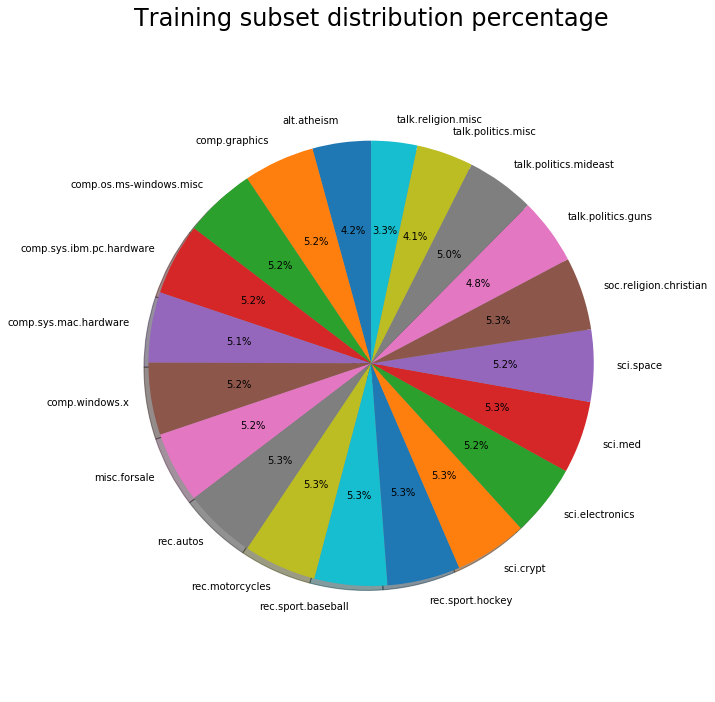

In [56]:
target_names = np.array(train_data.target_names)
freq_names = (np.zeros((target_names.size,2))).astype('unicode')
freq_names[:,0] = target_names
for i in np.arange(target_names.size):
    freq_names[i,1] = np.round(np.mean(y_train == i)*100,4)
Train_Distribution = pd.DataFrame(freq_names, columns = ['Target name','Frequency'])
print(Train_Distribution)

fig1, ax1 = plt.subplots(figsize = (10,10))
ax1.pie(freq_names[:,1], labels=freq_names[:,0], autopct='%1.1f%%',
        shadow=True, startangle=90)# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.title("Training subset distribution percentage", fontsize = 24) 
plt.tight_layout()
plt.show()

                 Target name Frequency
0                alt.atheism    4.2353
1              comp.graphics    5.1646
2    comp.os.ms-windows.misc     5.231
3   comp.sys.ibm.pc.hardware    5.2045
4      comp.sys.mac.hardware    5.1115
5             comp.windows.x    5.2443
6               misc.forsale    5.1779
7                  rec.autos    5.2576
8            rec.motorcycles    5.2841
9         rec.sport.baseball    5.2708
10          rec.sport.hockey    5.2974
11                 sci.crypt    5.2576
12           sci.electronics    5.2177
13                   sci.med    5.2576
14                 sci.space     5.231
15    soc.religion.christian    5.2841
16        talk.politics.guns    4.8327
17     talk.politics.mideast     4.992
18        talk.politics.misc    4.1158
19        talk.religion.misc    3.3324


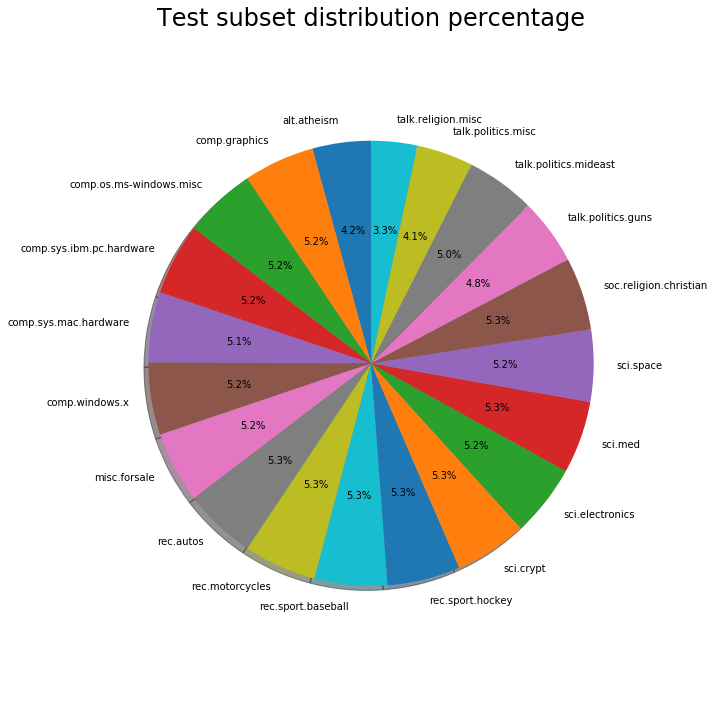

In [57]:
target_test_names = np.array(test_data.target_names)
freq_test_names = (np.zeros((target_test_names.size,2))).astype('unicode')
freq_test_names[:,0] = target_test_names
for i in np.arange(target_test_names.size):
    freq_test_names[i,1] = np.round(np.mean(y_test == i)*100,4)
Test_Distribution = pd.DataFrame(freq_test_names, columns = ['Target name','Frequency'])
print(Test_Distribution)

fig2, ax2 = plt.subplots(figsize = (10,10))
ax2.pie(freq_test_names[:,1], labels=freq_test_names[:,0], autopct='%1.1f%%',
        shadow=True, startangle=90)# Equal aspect ratio ensures that pie is drawn as a circle
ax2.axis('equal')  
plt.title("Test subset distribution percentage", fontsize = 24) 
plt.tight_layout()
plt.show()